In [1]:
#KNN Classification
import pandas as pd
#from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded=files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data.csv


In [4]:
#filename = 'pima-indians-diabetes.data.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = read_csv(filename, names=names)
dataframe=pd.read_csv('pima-indians-diabetes.data.csv',
                   names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#preg - No. of Pregnancies
#plas - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#pres - Diastolic blood pressure (mm Hg)
#skin - Triceps ski fold thickness (mm)
#test - 2-Hour serum insulin (mu U/ml)
#mass - Body mass index (weight in kg/(height in m)^2)
#pedi - Diabetes pedigree function
#age - Age (years)
#class - Diabetic = 1 / Non Diabetic = 0

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
768/8

96.0

diab=diab.apply(pd.to_numeric)
diab

In [6]:
dataframe.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [7]:
#X= dataframe.loc[:,['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
#Y= dataframe.loc[:,['class']]
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [8]:
scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
#print('Total Strength of Data',len(X))
#print('Number of observations with correct prediction',round(0.7460697197539303*len(X)))

Total Strength of Data 768
Number of observations with correct prediction 573


### Grid Search for Algorithm Tuning

In [9]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
import numpy
n_neighbors = numpy.array(range(1,81))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [11]:
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7669892199303965
{'n_neighbors': 17}


In [ ]:
import numpy
n_neighbors = numpy.arange(201,300)
param_grid = dict(n_neighbors=n_neighbors)
print(param_grid)
KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=KNN, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

{'n_neighbors': array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
       279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299])}
0.6510482981071216
{'n_neighbors': 201}


The data has 768 observations
So we divide the data into 4 equal parts, each part having 192 observations

- Part1 - 192 obs
- Part2 - 192 obs
- Part3 - 192 obs
- Part4 - 192 obs

1st iteration - All obs in Part1 are testing data, and obs in Part2, Part3, & Part4 are Training Dataset

2nd iteration - All obs in Part2 are testing data, and obs in Part1, Part3, & Part4 are Training Dataset

3rd iteration - All obs in Part3 are testing data, and obs in Part1, Part2, & Part4 are Training Dataset

4th iteration - All obs in Part4 are testing data, and obs in Part1, Part2, & Part3 are Training Dataset

In [ ]:
768/8

In [12]:
kfold = KFold(n_splits=8)
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)
results_df=pd.DataFrame()
results_df['Split No'] = list(range(8))
results_df['Accuracy'] = results
print(results.mean())
results_df

0.7578125


,Split No,Accuracy
0,0,0.739583
1,1,0.760417
2,2,0.677083
3,3,0.729167
4,4,0.781250
5,5,0.833333
6,6,0.781250
7,7,0.760417


### Visualizing the CV results

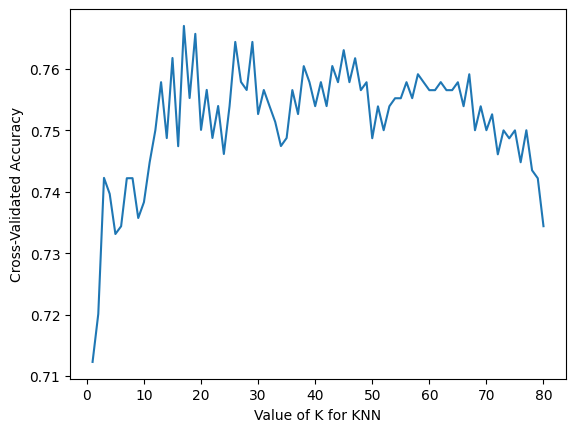

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 81)
k_scores = []
'''use iteration to caclulator different k in models,
then return the average accuracy based on the cross validation'''
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame(k_scores).sort_values(0)